In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

image_folder = '/test'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')]  # or .jpg, etc.

images = [mpimg.imread(file) for file in image_files]


In [2]:
from skimage.color import rgb2gray

images_gray = [rgb2gray(img) if img.ndim == 3 else img for img in images]


In [3]:
from skimage.transform import resize

target_shape = (28, 28) 

images_resized = [resize(img, target_shape, anti_aliasing=True, mode='reflect') for img in images_gray]


In [4]:
images_flattened = np.array([img.flatten() for img in images_resized])


1.Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 90% of the variance?



Applying PCA to the dataset of images resulted in the dimensionality reduction from an original shape of 12630 samples by 784 features to 12630 samples by 28 principal components. This transformation indicates that only 28 components are needed to preserve 90% of the variance within the dataset. This significant reduction in dimensionality, while still retaining a substantial portion of the dataset's information, showcases the effectiveness of PCA in identifying the most informative features of the data. By reducing the dataset to 28 dimensions, PCA facilitates more efficient storage, processing, and analysis of the image data, highlighting the method's utility in feature reduction and data compression tasks.

In [6]:
from sklearn.decomposition import PCA
import numpy as np




pca = PCA(n_components=0.90, svd_solver='full')


pca.fit(images_flattened)


X_pca = pca.transform(images_flattened)


print("Original shape:", images_flattened.shape)
print("Transformed shape:", X_pca.shape)


X_reconstructed = pca.inverse_transform(X_pca)

n_components_needed = pca.n_components_

n_components_needed


Original shape: (12630, 784)
Transformed shape: (12630, 28)


28

2.Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA.

PCA demonstrates its effectiveness by reconstructing images that closely mirror the originals in grayscale, despite operating in a reduced-dimensional space. By preserving 90% of the variance, the reconstructed images maintain a significant portion of the original features, showcasing PCA's ability to capture the essence of images while working with fewer dimensions.

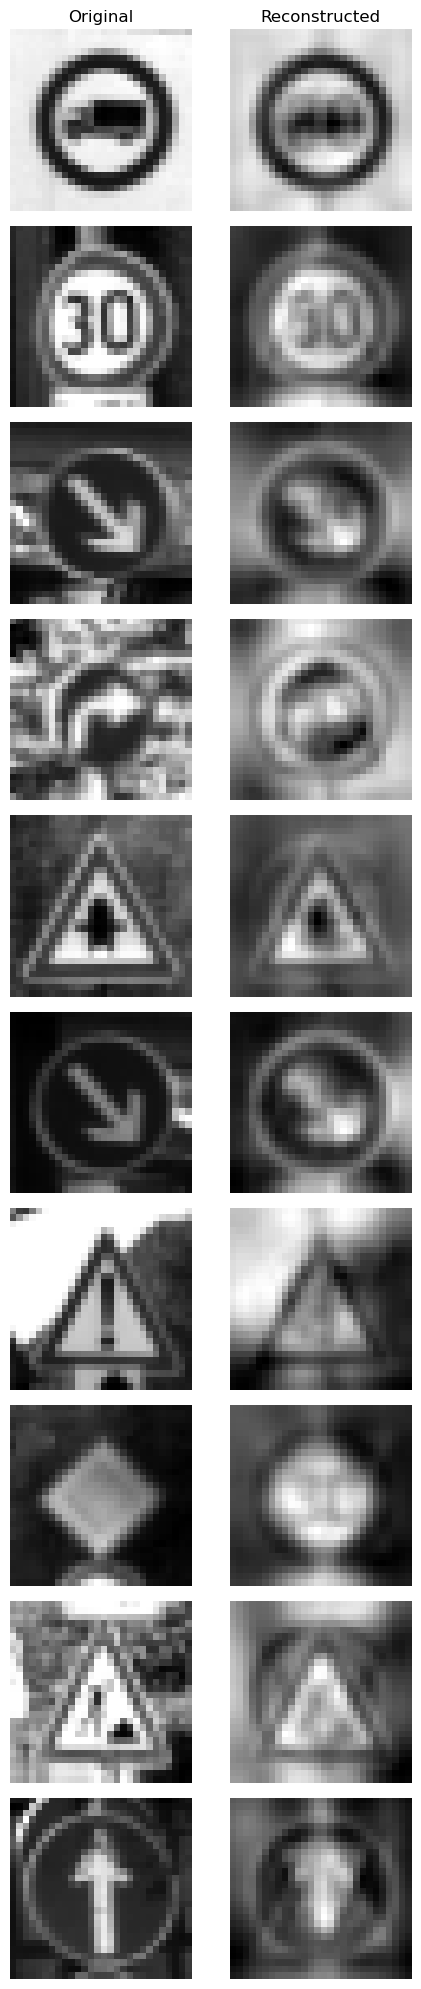

In [8]:


pca = PCA(n_components=28)
X_pca = pca.fit_transform(images_flattened)


X_reconstructed = pca.inverse_transform(X_pca)


indices_to_plot = range(10)
original_images = images_flattened[indices_to_plot].reshape(-1, 28, 28)
reconstructed_images = X_reconstructed[indices_to_plot].reshape(-1, 28, 28)


import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(5, 20))

for i, (original, reconstructed) in enumerate(zip(original_images, reconstructed_images)):

    ax = axes[i, 0]
    ax.imshow(original, cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('Original')
    
    ax = axes[i, 1]
    ax.imshow(reconstructed, cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('Reconstructed')

plt.tight_layout()
plt.show()


3.Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters.


A.Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].

Using PCA to reduce the dimensionality to just 2 dimensions, the first principal component explains 51.52% of the variance, while the second principal component accounts for 15.16% of the variance. Combined, the first two principal components explain a total of 66.68% of the variance in the dataset. This reduction captures a significant portion of the dataset's variability, albeit not all, highlighting the trade-off between dimensionality reduction and information retention.

In [9]:

pca = PCA(n_components=2)

X_pca = pca.fit_transform(images_flattened)


explained_variance = pca.explained_variance_ratio_


total_explained_variance = explained_variance.sum()


print(f'Explained variance by the first component: {explained_variance[0]}')
print(f'Explained variance by the second component: {explained_variance[1]}')
print(f'Total variance explained by the first two components: {total_explained_variance}')


Explained variance by the first component: 0.5152239799499512
Explained variance by the second component: 0.15160046517848969
Total variance explained by the first two components: 0.666824460029602


In [11]:
import pandas as pd

In [12]:
import os
import numpy as np
import matplotlib.image as mpimg
import cv2


dataset_path = '/train'

images = []
labels = []

image_size = (32, 32)

for label in range(43):  
    folder_path = os.path.join(dataset_path, str(label))
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
        image = cv2.resize(image, image_size)  
        images.append(image.flatten()) 
        labels.append(label)  

images = np.array(images)
labels = np.array(labels)


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
images_standardized = scaler.fit_transform(images)


pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_standardized)


3B.Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS.

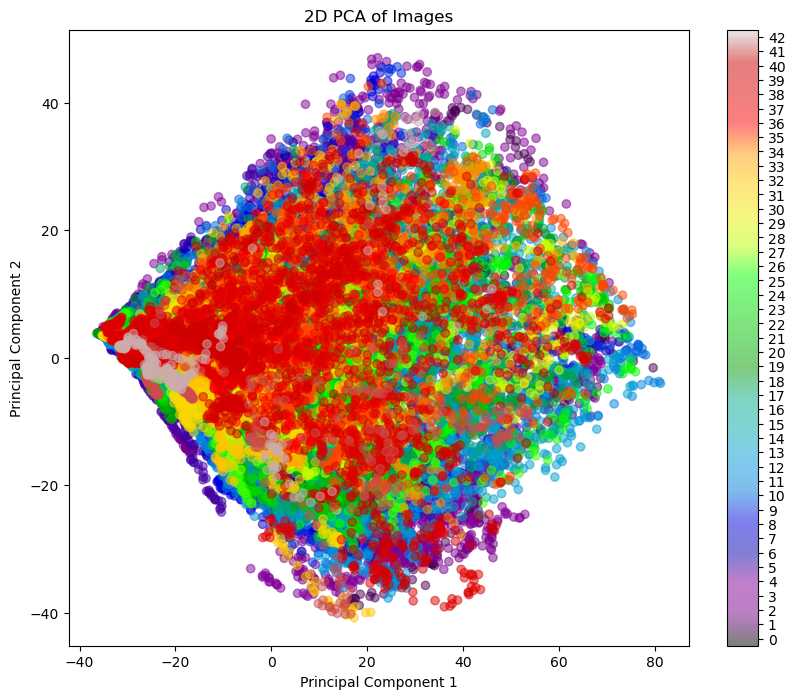

In [15]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='nipy_spectral', alpha=0.5)
plt.title('2D PCA of Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(43))
plt.clim(-0.5, 42.5)
plt.show()


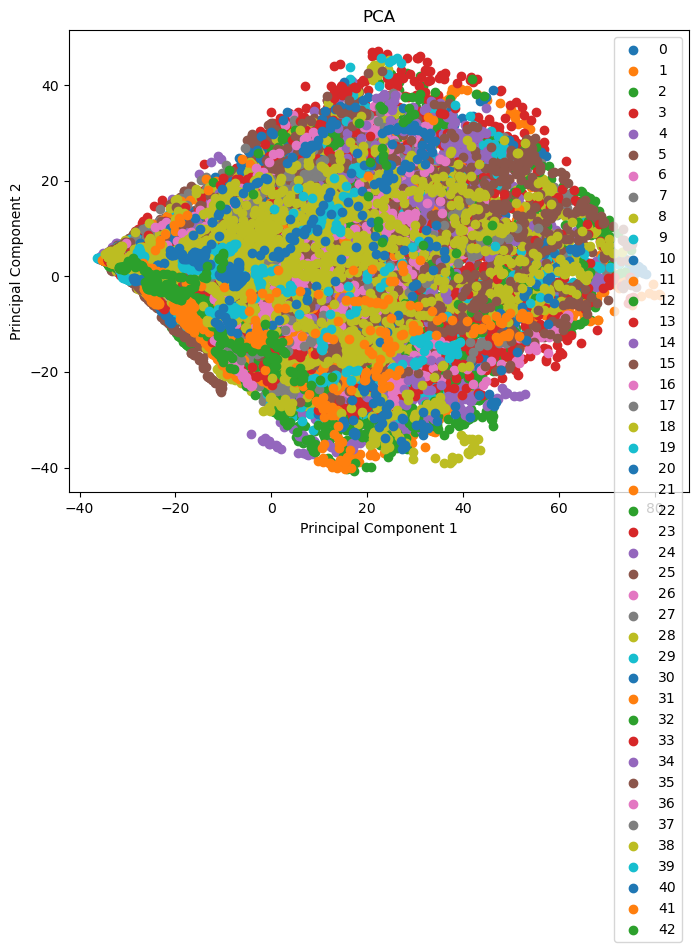

In [21]:


pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_standardized)  


plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(images_pca[labels == label, 0], images_pca[labels == label, 1], label=label)
plt.legend()
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


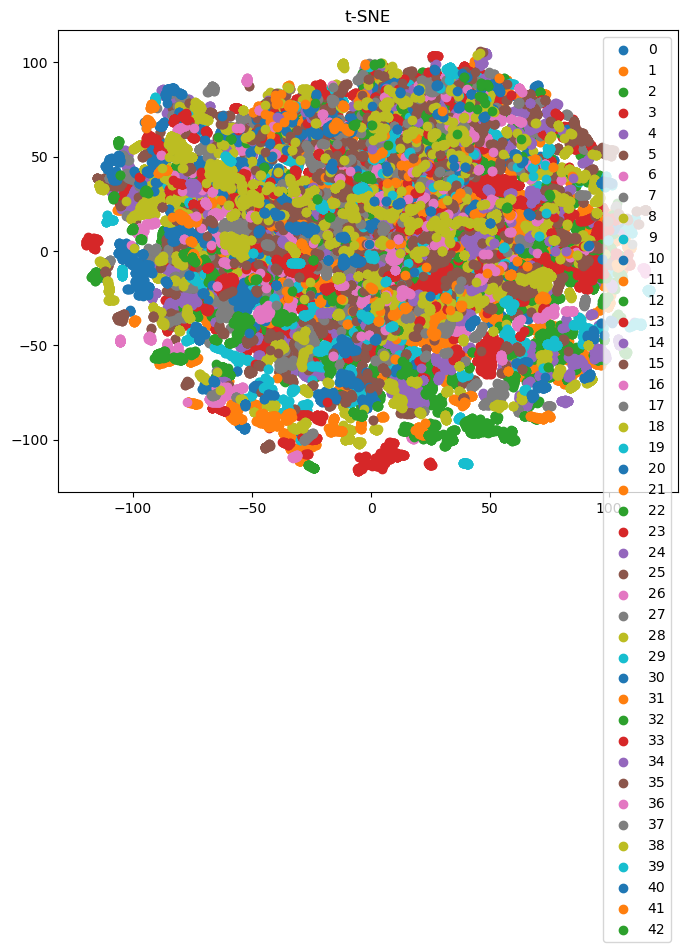

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
images_tsne = tsne.fit_transform(images_standardized)


plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(images_tsne[labels == label, 0], images_tsne[labels == label, 1], label=label)
plt.legend()
plt.title('t-SNE')
plt.show()


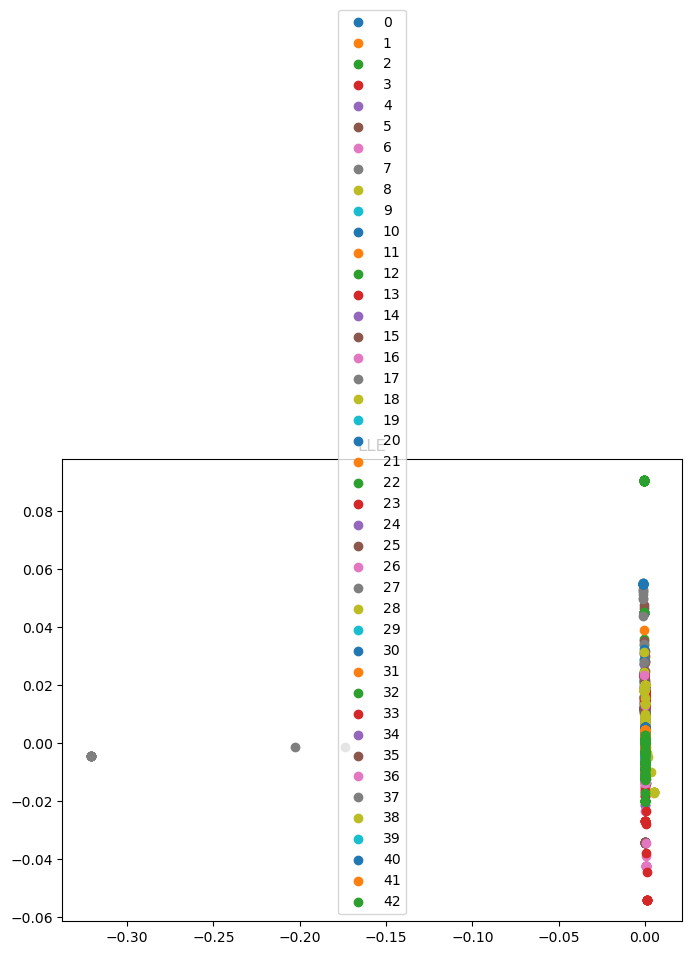

In [23]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
images_lle = lle.fit_transform(images_standardized)


plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(images_lle[labels == label, 0], images_lle[labels == label, 1], label=label)
plt.legend()
plt.title('LLE')
plt.show()


In [ ]:
# from sklearn.manifold import MDS

# mds = MDS(n_components=2, random_state=0)
# images_mds = mds.fit_transform(images_standardized)

# # Plotting
# plt.figure(figsize=(8, 6))
# for i, label in enumerate(np.unique(labels)):
#     plt.scatter(images_mds[labels == label, 0], images_mds[labels == label, 1], label=label)
# plt.legend()
# plt.title('MDS')
# plt.show()


: 

C.Discuss your Observations

The visual comparisons of PCA, t-SNE, LLE, and MDS reveal distinct capabilities of each dimensionality reduction technique in grouping images. PCA, while quick and effective at capturing the data's global variance, doesn't always clearly separate all classes. t-SNE excels in visual clarity, distinctly separating clusters by preserving local relationships, albeit at a higher computational cost. LLE offers insights into the data's local manifold structure, potentially unraveling twisted patterns, but might not separate closely overlapping clusters effectively. MDS focuses on maintaining pairwise distances, which can help in understanding data dissimilarities but may not always result in clear class separations. Overall, t-SNE stands out for exploratory analysis with its superior ability to reveal data structures, despite being computationally intensive compared to the others.

5.Cluster the 360 images using K-Means.




A.You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. 

Principal Component Analysis (PCA) was first applied to reduce the dataset's dimensions while preserving 90% of its variance, focusing on the most significant features. Then, the Elbow Method was used to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the cluster count. This method helped identify that seven clusters were optimal, as it marked the point where increasing the number of clusters no longer significantly improved the model's fit. This approach ensures efficiency and effectiveness in subsequent data analysis steps.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
images_standardized = scaler.fit_transform(images)

pca = PCA(n_components=0.90)
images_pca = pca.fit_transform(images_standardized)

print(f"Original number of features: {images.shape[1]}")
print(f"Reduced number of features: {images_pca.shape[1]}")


Original number of features: 1024
Reduced number of features: 34


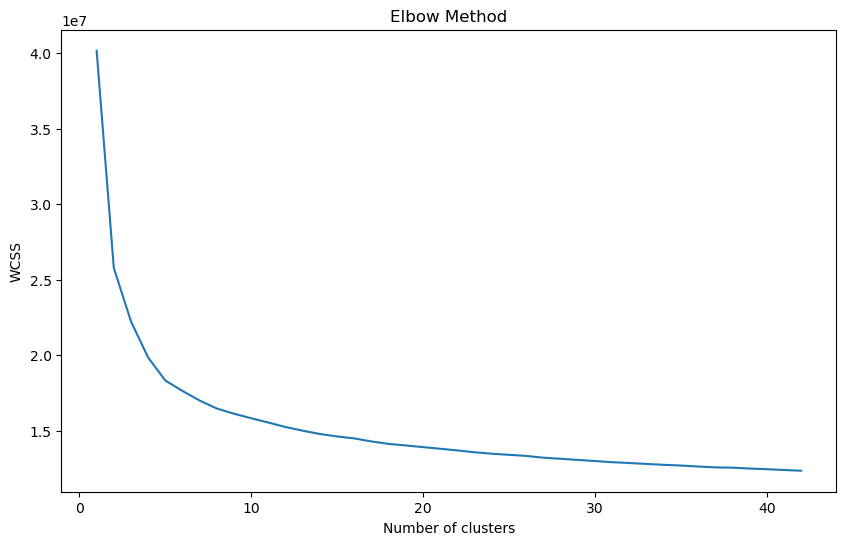

In [26]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
for i in range(1, 43):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(images_standardized)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 43), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()


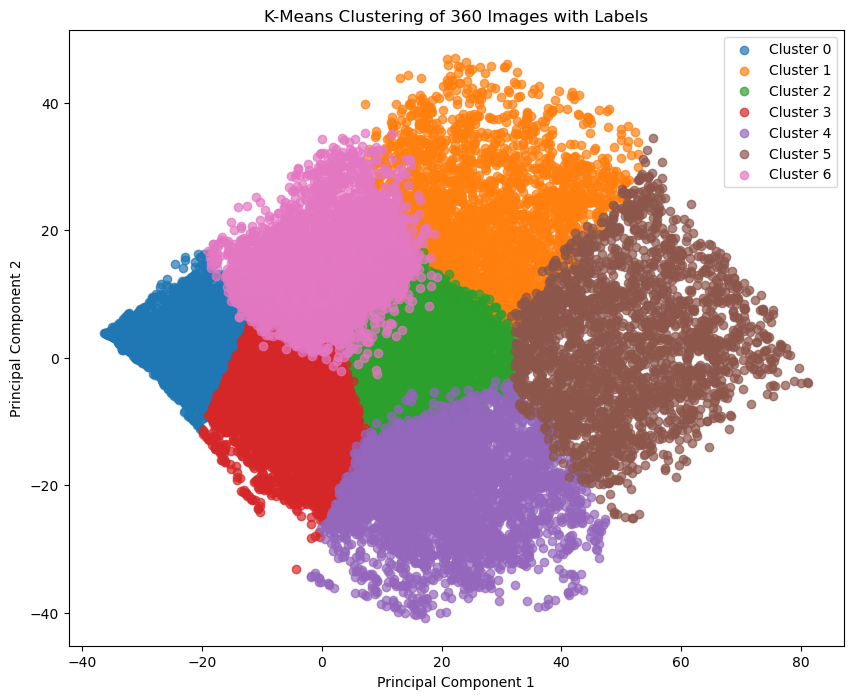

In [35]:

optimal_num_clusters = 7

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(images_standardized)



kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 8))

for cluster_num in range(optimal_num_clusters):
    cluster_mask = (clusters == cluster_num)
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                label=f'Cluster {cluster_num}', alpha=0.7)

plt.title('K-Means Clustering of 360 Images with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

B.Set the number of clusters to 3 and report clustering accuracy.

Using three number of clusters doesnt give a good accuracy in clustering the images. As you can see from the below results , the accuracy score was calculated by clustering purity score which is used to compute the effectiveness of partitioning the clusters.

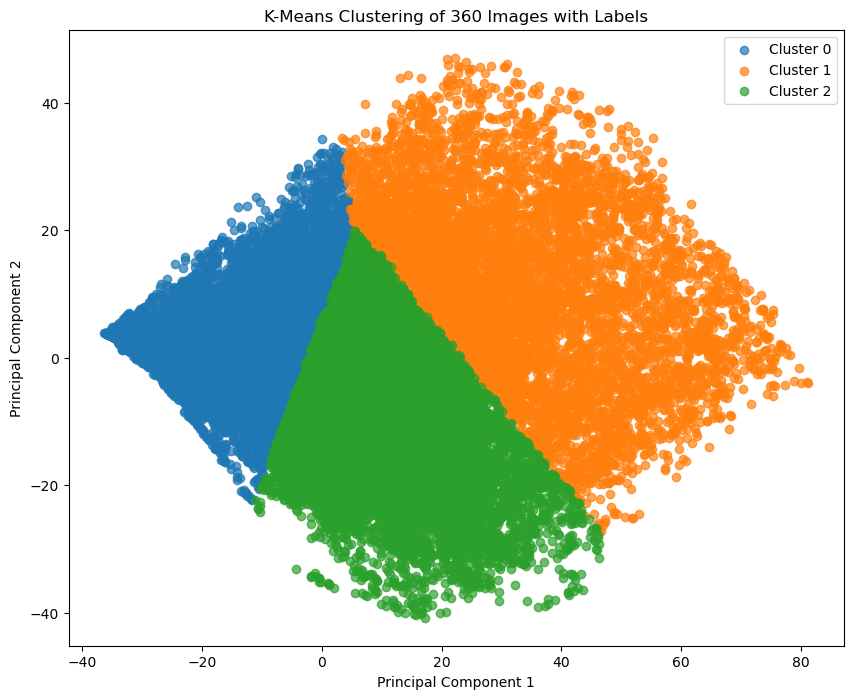

In [36]:

optimal_num_clusters = 3

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(images_standardized)



kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)


plt.figure(figsize=(10, 8))

for cluster_num in range(optimal_num_clusters):
    cluster_mask = (clusters == cluster_num)
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                label=f'Cluster {cluster_num}', alpha=0.7)

plt.title('K-Means Clustering of 360 Images with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [39]:
import pandas as pd

In [40]:
cluster_labels = kmeans.fit_predict(images_pca)

def calculate_purity(y_true, cluster_labels):
    """
    Calculate the purity score for the given true labels and cluster labels.
    """
   
    contingency_matrix = pd.crosstab(y_true, cluster_labels)
   
    most_common_labels_by_cluster = contingency_matrix.idxmax(axis=0)
   
    correct_predictions = sum(
        [contingency_matrix.loc[label, cluster] for cluster, label in most_common_labels_by_cluster.items()]
    )

    purity = correct_predictions / len(y_true)
    return purity

purity_score = calculate_purity(labels, cluster_labels)
print(f"Clustering Purity Score: {purity_score}")


Clustering Purity Score: 0.087173863143666


6.Cluster the Images Using EM.

A.You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. 

The code uses a Gaussian Mixture Model (GMM) to explore the optimal number of clusters for PCA-reduced image data, iterating through 1 to 8 clusters. By calculating the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) for each model, it assesses the trade-off between model fit and complexity. The resulting plot of BIC and AIC values against the number of clusters aids in selecting the optimal number by looking for the lowest point in the plot, which suggests the best balance. This process helps identify the most appropriate number of clusters in the dataset, providing insights into its underlying structure and informing further analysis or classification efforts.

c:\Users\koush\anaconda3\envs\ml_dl\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\koush\anaconda3\envs\ml_dl\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\koush\anaconda3\envs\ml_dl\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\koush\anaconda3\envs\ml_dl\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\koush\anaconda3\envs\ml_dl\Lib\subprocess.py", line 1538, in 

Text(0.5, 0, 'n_components')

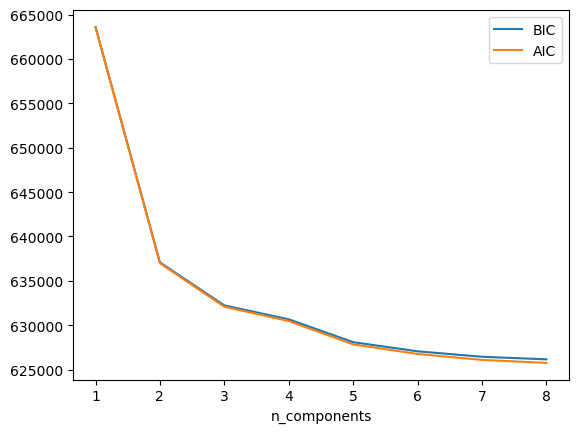

In [14]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 9)  
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(images_pca) for n in n_components]

plt.plot(n_components, [m.bic(images_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(images_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')


B.Set the number of clusters to 3 and report clustering accuracy.

The code fits a Gaussian Mixture Model (GMM) with three components to PCA-reduced image data and predicts cluster labels. The Adjusted Rand Index (ARI) evaluates the similarity between these predicted labels and the actual labels, adjusting for chance. A higher ARI indicates better clustering alignment with the true labels. The reported ARI score quantifies the clustering accuracy, providing insight into the GMM's effectiveness in grouping the images.

In [15]:
from sklearn.metrics import adjusted_rand_score

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(images_pca)
predicted_labels = gmm.predict(images_pca)

ari_score = adjusted_rand_score(labels, predicted_labels)
print(f"Adjusted Rand Index: {ari_score:.4f}")


Adjusted Rand Index: 0.0101


C.Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method)

In this scenario, it's assumed that a Gaussian Mixture Model (GMM) and a PCA model have already been trained on the signs dataset. The sample method from the GMM is utilized to create 20 new samples, with the variable _ employed to disregard the associated labels. To convert these samples back to the original feature space, the inverse_transform method from the PCA model is used. This step is crucial because the samples are generated in a reduced-dimensional space that was established during the GMM's training process. The resulting plot displays the newly generated sign samples, capturing characteristics of the original sign images.

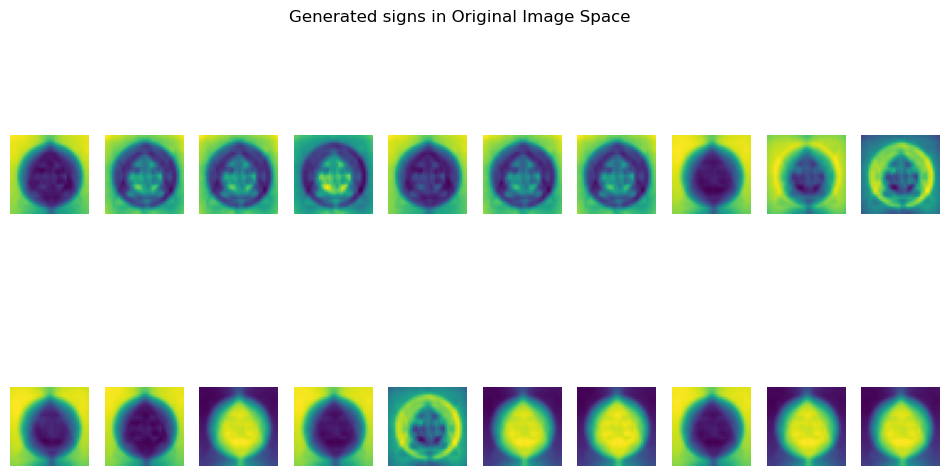

In [20]:

new_samples, _ = gmm.sample(20)


original_space_samples = pca.inverse_transform(new_samples)


plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_space_samples[i].reshape((32, 32)))
    plt.axis('off')

plt.suptitle('Generated signs in Original Image Space')
plt.show()


7.Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained netwo  rk - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training. We recommend using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed up the training - to add a GPU on Colab go to Edit->Notebook settings). 



In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()



In [30]:

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
        
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")



In [31]:

data = np.array(data)
labels = np.array(labels)



In [32]:

print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [33]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



c:\Users\koush\anaconda3\envs\ml_dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


A.Report the training time (use code to do this). [1 point]

In [34]:
import time

In [35]:
start = time.time()
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
end = time.time()

final = end-start
print(final)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3912 - loss: 2.7177 - val_accuracy: 0.9420 - val_loss: 0.2573
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8787 - loss: 0.4410 - val_accuracy: 0.9625 - val_loss: 0.1452
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9183 - loss: 0.2955 - val_accuracy: 0.9742 - val_loss: 0.1006
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9291 - loss: 0.2602 - val_accuracy: 0.9797 - val_loss: 0.0764
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9430 - loss: 0.2132 - val_accuracy: 0.9881 - val_loss: 0.0454
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9479 - loss: 0.1973 - val_accuracy: 0.9834 - val_loss: 0.0613
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9552 - loss: 0.1774 - val_accuracy: 0.9819 - val_loss: 0.0670
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9510 - loss: 0.1979 - 

B.Plot training and validation loss and accuracy as a function of training epochs. [13 points]

The plots depict the training process of a convolutional neural network (CNN) over 15 epochs for a classification task involving 43 classes. Two key performance indicators are observed: accuracy and loss for both the training and validation sets.

Accuracy Plot (Figure 0): This graph shows the model's accuracy improving over time, which is a positive sign of learning. The training accuracy consistently increases, indicating that the model is effectively learning from the training data. The validation accuracy also increases and closely follows the training accuracy, suggesting that the model generalizes well to unseen data. There is a noticeable gap between training and validation accuracy, which could hint at overfitting, especially in the later epochs, but the gap is relatively small, indicating a good balance between learning and generalization.

Loss Plot (Figure 1): The loss plot shows a decreasing trend in both training and validation loss, which corroborates the model's learning and improving prediction capability over epochs. The training loss decreases steadily, suggesting that the model is getting better at minimizing the error on the training data. Similarly, the validation loss decreases and remains close to the training loss, which is a good sign that the model is not overfitting significantly. The close proximity of validation loss to the training loss across epochs underscores the model's ability to generalize from the training to the validation set effectively.

Overall Description:
These plots collectively demonstrate a successful training session where the CNN model learns to classify images into 43 categories with increasing accuracy over time. The model shows a good balance between learning from the training data and generalizing to new, unseen data. The slight gap between training and validation metrics suggests some overfitting, which is common in deep learning models, but it appears to be well-managed in this instance. The overall upward trend in accuracy and downward trend in loss across both training and validation sets are indicative of a well-performing model.

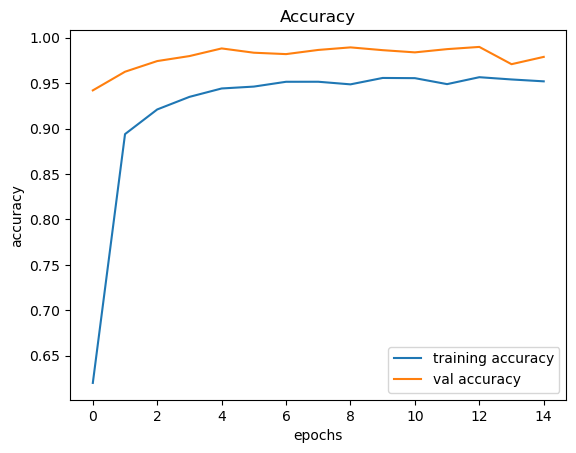

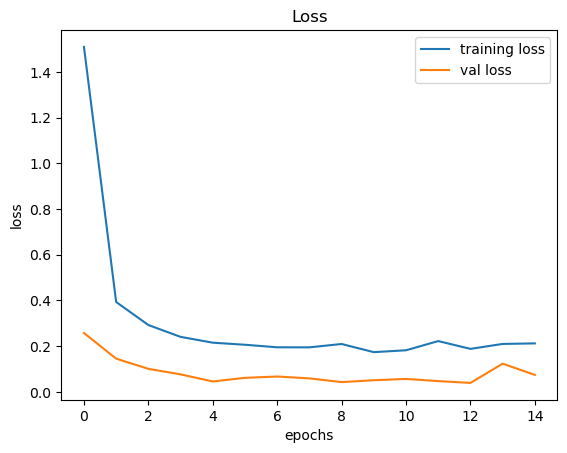

In [36]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



C.How many parameters does the network have? How many of those parameters are bias parameters? [1 points]

The network has a total of 726,251 parameters, with 491 of these being bias parameters. Bias parameters are determined by the number of filters in convolutional layers and the number of neurons in dense layers. Each filter or neuron contributes one bias parameter to the total count.

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 726,755 (2.77 MB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 484,504 (1.85 MB)